<a href="https://colab.research.google.com/github/sharat-shankar/Deep-Learning/blob/master/J045_(DL_01_03_2020_Practical_Test_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
split = ['train','test','validation']
classes = ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']
for spl in split:
  os.mkdir('/content/'+str(spl))
  for cls in classes:
    os.mkdir('/content/'+str(spl)+'/'+str(cls))

In [0]:
import glob
import cv2
for cls in classes:
  i = 0
  for file in glob.glob("/content/drive/My Drive/UCMerced_LandUse/Images/"+cls+"/*.tif"):
    img  = cv2.imread(file)
    basename = os.path.basename(file) 
    if i < 60:
      path = '/content/train/'+str(cls)+'/'+str(basename)
      cv2.imwrite(path,img)
      i = i+1
    elif i < 80:
      path = '/content/validation/'+str(cls)+'/'+str(basename)
      cv2.imwrite(path,img)
      i = i+1
    else:
      path = '/content/test/'+str(cls)+'/'+str(basename)
      cv2.imwrite(path,img)
      i = i+1

In [0]:
original_test = '/content/test/'
filenames = [] 
categories = []
for cls in classes:
  for file in glob.glob("/content/test/"+cls+"/*.tif"):
    filenames.append(file)
    categories.append(cls)

data_test = pd.DataFrame({'filename':filenames,'label':categories})

data_test.to_csv("original_test.csv",index=False)

In [0]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
train_generator = train_datagen.flow_from_directory(
    directory=r"/content/train/",
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

valid_generator = test_datagen.flow_from_directory(
    directory=r"/content/validation/",
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory="/content/test/",
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 1260 images belonging to 21 classes.
Found 420 images belonging to 21 classes.
Found 420 images belonging to 21 classes.


In [63]:
from keras.utils.np_utils import to_categorical
from keras import models
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

input_shape = (256,256,3)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(21, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adamax',
                  metrics=['accuracy'])

model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50)

Epoch 1/50
39/39 [==============================] - 122s 3s/step - loss: 2.9886 - acc: 0.0702 - val_loss: 2.9076 - val_acc: 0.1034
Epoch 2/50
39/39 [==============================] - 119s 3s/step - loss: 2.6825 - acc: 0.1639 - val_loss: 2.7792 - val_acc: 0.1675
Epoch 3/50
39/39 [==============================] - 120s 3s/step - loss: 2.3416 - acc: 0.2895 - val_loss: 2.4198 - val_acc: 0.2603
Epoch 4/50
39/39 [==============================] - 119s 3s/step - loss: 1.9120 - acc: 0.4209 - val_loss: 2.4873 - val_acc: 0.3479
Epoch 5/50
39/39 [==============================] - 119s 3s/step - loss: 1.6746 - acc: 0.4784 - val_loss: 1.8792 - val_acc: 0.4278
Epoch 6/50
39/39 [==============================] - 119s 3s/step - loss: 1.4286 - acc: 0.5540 - val_loss: 1.9383 - val_acc: 0.4356
Epoch 7/50
39/39 [==============================] - 119s 3s/step - loss: 1.3795 - acc: 0.5601 - val_loss: 2.1284 - val_acc: 0.4227
Epoch 8/50
39/39 [==============================] - 121s 3s/step - loss: 1.1986 - a

In [64]:
model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID)

[2.829264081441439, 0.5288461538461539]

In [65]:
import pandas as pd

STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

420/420 [==============================] - 13s 32ms/step


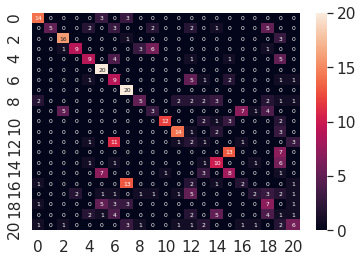

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm=confusion_matrix(data_test['label'],results['Predictions'])

sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 6}) # font size
plt.show()

In [68]:
from sklearn.metrics import classification_report
print(classification_report(data_test['label'],results['Predictions']))

                   precision    recall  f1-score   support

     agricultural       0.74      0.70      0.72        20
         airplane       1.00      0.25      0.40        20
  baseballdiamond       0.70      0.80      0.74        20
            beach       0.82      0.45      0.58        20
        buildings       0.56      0.45      0.50        20
        chaparral       0.54      1.00      0.70        20
 denseresidential       0.25      0.45      0.32        20
           forest       0.47      1.00      0.63        20
          freeway       0.50      0.25      0.33        20
       golfcourse       0.25      0.15      0.19        20
           harbor       0.92      0.60      0.73        20
     intersection       0.74      0.70      0.72        20
mediumresidential       0.09      0.10      0.09        20
   mobilehomepark       0.00      0.00      0.00        20
         overpass       0.43      0.50      0.47        20
       parkinglot       0.30      0.40      0.34       

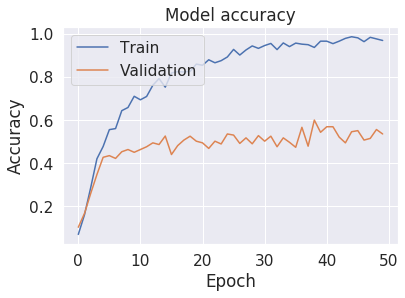

In [69]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
history = model.history
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


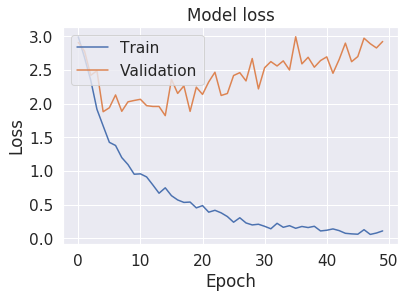

In [70]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()